In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
data1 = pd.read_csv('./datasets/cleaned/vaccines-labeled-lexicon.csv')
data1.count()

username            12000
location            12000
following           12000
followers           12000
whentweetcreated    12000
whenacctcreated     12000
retweets            12000
text                12000
hashtags            12000
mentioned_users     12000
cleaned_text        12000
sentiment           12000
dtype: int64

In [3]:
data2 = pd.read_csv('./datasets/cleaned/vaccines-labeled-manual.csv')
data2.count()

username            1340
location            1340
following           1340
followers           1340
whentweetcreated    1340
whenacctcreated     1340
retweets            1340
text                1340
hashtags            1340
mentioned_users     1340
cleaned_text        1340
sentiment           1339
dtype: int64

In [4]:
data = pd.concat([data1, data2], axis=0, ignore_index=True)
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)
data.count()

username            13339
location            13339
following           13339
followers           13339
whentweetcreated    13339
whenacctcreated     13339
retweets            13339
text                13339
hashtags            13339
mentioned_users     13339
cleaned_text        13339
sentiment           13339
dtype: int64

In [5]:
print(data.shape)

(13339, 12)


In [6]:
data.tail()

,username,location,following,followers,whentweetcreated,whenacctcreated,retweets,text,hashtags,mentioned_users,cleaned_text,sentiment
13334,TAMUGradSchool,"college station, tx",174,2492,2021-04-05 20:28:02,2009-05-08 14:17:08,30,Texas A&amp;M is participating in a national s...,['covid19'],[],texas a&m participate national study determine...,Neutral
13335,domstadtmedicus,"köln, deutschland",132,58,2021-04-05 20:28:04,2020-03-21 08:45:37,50,A new HIV vaccine with a 97% antibody response...,[],[],new hiv vaccine antibody response rate phase h...,Positive
13336,ButNotTheRapper,"san marcos, tx",4229,1091,2021-04-05 20:28:13,2016-05-24 14:56:46,415,Holy shit.\n\nA new HIV vaccine with a 97% ant...,[],[],holy shit. a new hiv vaccine antibody response...,Positive
13337,SCEMD,south carolina,1497,58075,2021-04-05 20:28:13,2009-07-15 13:37:56,1,❗❗VACCINE APPOINTMENTS - MODERNA - CHESTER COU...,[],['@MUSChealth'],vaccine appointment moderna chester county app...,Neutral
13338,_james_jacob,germany,912,184,2021-04-05 20:28:17,2009-09-15 15:47:51,31159,WOW 😳 New HIV vaccine with a 97% antibody resp...,[],[],wow new hiv vaccine antibody response rate pha...,Positive


In [7]:
dataDoc = data['cleaned_text'].values.tolist()
dataClass = data['sentiment'].values.tolist()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.3, random_state = 42)

In [9]:
vectorizer = TfidfVectorizer(
    max_features = 1500,
    ngram_range=(1,2),
    max_df = 0.9,
    min_df= 5
)

In [10]:
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [11]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
# logistic regression
model1 = OneVsRestClassifier(LogisticRegression(penalty = 'l2', C = 1.0, max_iter=1000))
model1.fit(x_train_vec, y_train)

preds_log = model1.predict(x_test_vec)
accuracy_log = accuracy_score(y_test, preds_log)

print('Logistic Regression Accuracy: {}'.format(accuracy_log))

Logistic Regression Accuracy: 0.7028985507246377


In [13]:
# stochastic gradient descent
model2 = SGDClassifier(loss = 'hinge', penalty = 'elasticnet', max_iter = 1000)
model2.fit(x_train_vec, y_train)

preds_sgd = model2.predict(x_test_vec)
accuracy_sgd = accuracy_score(y_test, preds_sgd)

print("SGD Accuracy: {}".format(accuracy_sgd))

SGD Accuracy: 0.731384307846077


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

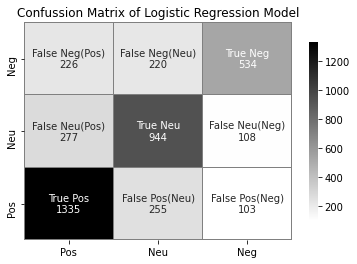

In [15]:
# confussion matrix of logistic regression
labels=['Positive', 'Neutral', 'Negative']
cm_log = confusion_matrix(y_test, preds_log, labels=labels)

# visualization
group_names = ['True Pos', 'False Pos(Neu)', 'False Pos(Neg)',
                'False Neu(Pos)', 'True Neu', 'False Neu(Neg)',
                'False Neg(Pos)', 'False Neg(Neu)', 'True Neg']

group_counts = ['{0:0.0f}'.format(value) for value in cm_log.flatten()]

x_axis_labels = ['Pos', 'Neu', 'Neg']
y_axis_labels = ['Pos', 'Neu', 'Neg']

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(3,3)

res = sns.heatmap(cm_log, annot=labels, xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt='', cmap='binary', cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')            
res.invert_yaxis()

plt.title('Confussion Matrix of Logistic Regression Model')

plt.savefig('./visualizations/model/confussion-matrix-logreg.png')

In [16]:
print(np.count_nonzero(preds_log == 'Positive'))
print(np.count_nonzero(preds_log == 'Neutral'))
print(np.count_nonzero(preds_log == 'Negative'))

1838
1419
745


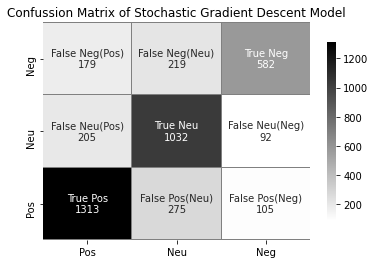

In [17]:
# confussion matrix of stochastic gradient descent
labels=['Positive', 'Neutral', 'Negative']
cm_sgd = confusion_matrix(y_test, preds_sgd, labels=labels)

# visualization
group_names = ['True Pos', 'False Pos(Neu)', 'False Pos(Neg)',
                'False Neu(Pos)', 'True Neu', 'False Neu(Neg)',
                'False Neg(Pos)', 'False Neg(Neu)', 'True Neg']

group_counts = ['{0:0.0f}'.format(value) for value in cm_sgd.flatten()]

x_axis_labels = ['Pos', 'Neu', 'Neg']
y_axis_labels = ['Pos', 'Neu', 'Neg']

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(3,3)

res = sns.heatmap(cm_sgd, annot=labels, xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt='', cmap='binary', cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')            
res.invert_yaxis()

plt.title('Confussion Matrix of Stochastic Gradient Descent Model')

plt.savefig('./visualizations/model/confussion-matrix-sgd.png')

In [18]:
print(np.count_nonzero(preds_sgd == 'Positive'))
print(np.count_nonzero(preds_sgd == 'Neutral'))
print(np.count_nonzero(preds_sgd == 'Negative'))

1697
1526
779


In [19]:
analyze = pd.read_csv('./datasets/cleaned/vaccines-to-sent-classify.csv')

In [20]:
analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36045 entries, 0 to 36044
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   username          36045 non-null  object
 1   location          36045 non-null  object
 2   following         36045 non-null  int64 
 3   followers         36045 non-null  int64 
 4   whenacctcreated   36045 non-null  object
 5   text              36045 non-null  object
 6   retweets          36045 non-null  int64 
 7   favourites        36045 non-null  int64 
 8   hashtags          36045 non-null  object
 9   whentweetcreated  36045 non-null  object
 10  mentioned_users   36045 non-null  object
 11  cleaned_text      36045 non-null  object
 12  vaccine           36045 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.6+ MB


In [21]:
analyzeDoc = analyze['cleaned_text'].values.tolist()

In [22]:
analyzeVec = vectorizer.transform(analyzeDoc)

In [23]:
# sgd model selected due to higher accuracy
preds = model2.predict(analyzeVec)

In [24]:
analyze['sentiment'] = preds

In [25]:
astrazeneca = analyze[analyze['vaccine'] == 'Astrazeneca']
biontech = analyze[analyze['vaccine'] == 'Biontech']
moderna = analyze[analyze['vaccine'] == 'Moderna']
sinovac = analyze[analyze['vaccine'] == 'Sinovac']
sputnik = analyze[analyze['vaccine'] == 'Sputnik']

,username,location,following,followers,whenacctcreated,text,retweets,favourites,hashtags,whentweetcreated,mentioned_users,cleaned_text,vaccine
sentiment,,,,,,,,,,,,,
Negative,716,716,716,716,716,716,716,716,716,716,716,716,716
Neutral,1674,1674,1674,1674,1674,1674,1674,1674,1674,1674,1674,1674,1674
Positive,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323


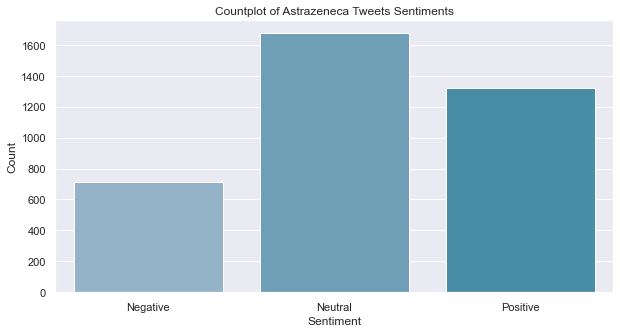

In [26]:
plt.figure(figsize = (10,5))
sns.set_theme(style='darkgrid')
sns.set_palette('PuBuGn_d')
sns.countplot(x = astrazeneca['sentiment'], order=['Negative', 'Neutral', 'Positive'])
plt.title('Countplot of Astrazeneca Tweets Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('./visualizations/astrazeneca-sentiments.png')
astrazeneca.groupby('sentiment').count()

,username,location,following,followers,whenacctcreated,text,retweets,favourites,hashtags,whentweetcreated,mentioned_users,cleaned_text,vaccine
sentiment,,,,,,,,,,,,,
Negative,449,449,449,449,449,449,449,449,449,449,449,449,449
Neutral,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124
Positive,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429


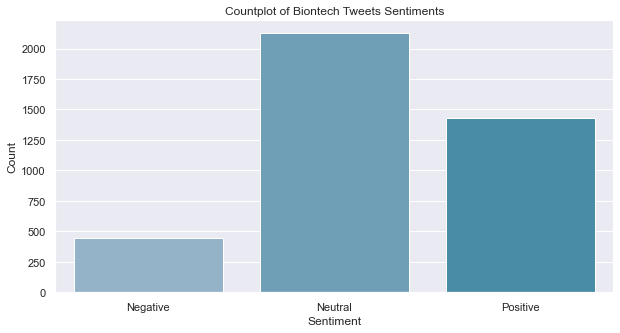

In [27]:
plt.figure(figsize = (10,5))
sns.set_theme(style='darkgrid')
sns.set_palette('PuBuGn_d')
sns.countplot(x = biontech['sentiment'], order=['Negative', 'Neutral', 'Positive'])
plt.title('Countplot of Biontech Tweets Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('./visualizations/biontech-sentiments.png')
biontech.groupby('sentiment').count()

,username,location,following,followers,whenacctcreated,text,retweets,favourites,hashtags,whentweetcreated,mentioned_users,cleaned_text,vaccine
sentiment,,,,,,,,,,,,,
Negative,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374
Neutral,8990,8990,8990,8990,8990,8990,8990,8990,8990,8990,8990,8990,8990
Positive,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901


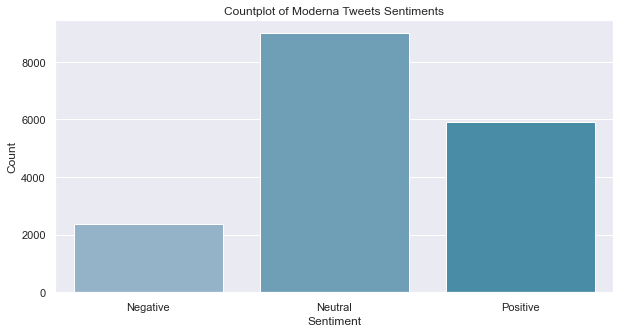

In [28]:
plt.figure(figsize = (10,5))
sns.set_theme(style='darkgrid')
sns.set_palette('PuBuGn_d')
sns.countplot(x = moderna['sentiment'], order=['Negative', 'Neutral', 'Positive'])
plt.title('Countplot of Moderna Tweets Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('./visualizations/moderna-sentiments.png')
moderna.groupby('sentiment').count()

,username,location,following,followers,whenacctcreated,text,retweets,favourites,hashtags,whentweetcreated,mentioned_users,cleaned_text,vaccine
sentiment,,,,,,,,,,,,,
Negative,430,430,430,430,430,430,430,430,430,430,430,430,430
Neutral,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618
Positive,698,698,698,698,698,698,698,698,698,698,698,698,698


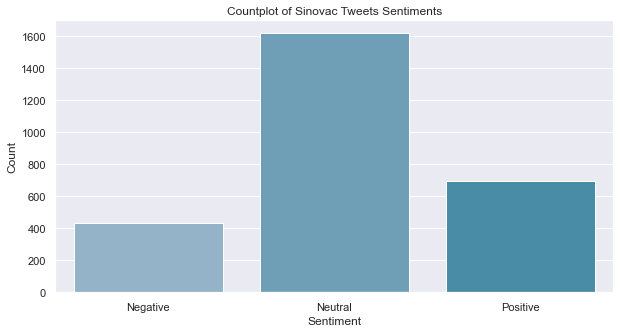

In [29]:
plt.figure(figsize = (10,5))
sns.set_theme(style='darkgrid')
sns.set_palette('PuBuGn_d')
sns.countplot(x = sinovac['sentiment'], order=['Negative', 'Neutral', 'Positive'])
plt.title('Countplot of Sinovac Tweets Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('./visualizations/sinovac-sentiments.png')
sinovac.groupby('sentiment').count()

,username,location,following,followers,whenacctcreated,text,retweets,favourites,hashtags,whentweetcreated,mentioned_users,cleaned_text,vaccine
sentiment,,,,,,,,,,,,,
Negative,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133
Neutral,4772,4772,4772,4772,4772,4772,4772,4772,4772,4772,4772,4772,4772
Positive,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414


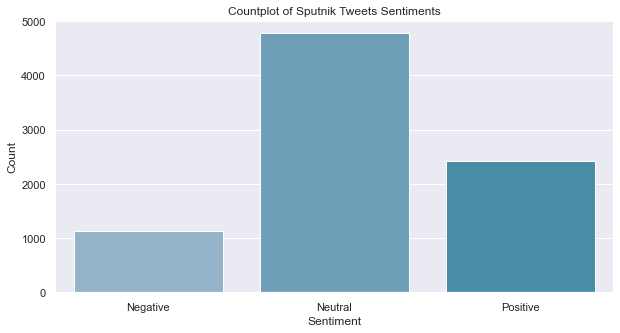

In [30]:
plt.figure(figsize = (10,5))
sns.set_theme(style='darkgrid')
sns.set_palette('PuBuGn_d')
sns.countplot(x = sputnik['sentiment'], order=['Negative', 'Neutral', 'Positive'])
plt.title('Countplot of Sputnik Tweets Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('./visualizations/sputnik-sentiments.png')
sputnik.groupby('sentiment').count()

In [31]:
pd.set_option('display.max_colwidth', None)

In [32]:
import html
import re

def better_text(text):
    # remove html chars
    text = html.unescape(text)

    # remove urls
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)

    # remove &amp;
    text = text.replace('&amp;', 'and')

    # lower text
    text = text.lower()

    return text

In [33]:
analyze['text'] = analyze['text'].apply(lambda x: better_text(x))

In [34]:
samplesNeg = analyze[analyze['sentiment'] == 'Negative'].sample(n=10)[['text','sentiment']]
samplesPos = analyze[analyze['sentiment'] == 'Positive'].sample(n=10)[['text','sentiment']]
samplesNeu = analyze[analyze['sentiment'] == 'Neutral'].sample(n=10)[['text','sentiment']]

In [35]:
samples = pd.concat([samplesNeg, samplesNeu, samplesPos], ignore_index=True)

In [36]:
samples.to_excel('./samples.xlsx', index=False)

In [37]:
analyze['location'].value_counts()

n.a.                                  7787
india                                  758
united states                          418
london, england                        267
new delhi, india                       259
                                      ... 
metro detroit                            1
treaty 6                                 1
untidied states                          1
wake forest, nc via raubsville, pa       1
uk/de/us                                 1
Name: location, Length: 8655, dtype: int64

In [38]:
# elimination of n.a. values

location = analyze['location']
unique_locations = location.value_counts()

unique_locations = pd.DataFrame({'locations': unique_locations.index, 'count': unique_locations.values})
unique_locations.drop(0, inplace=True)

unique_locations.sort_values(by = 'count', ascending = False).head(10)

,locations,count
1,india,758
2,united states,418
3,"london, england",267
4,"new delhi, india",259
5,"los angeles, ca",240
6,london,233
7,"beijing, china",222
8,"mumbai, india",186
9,"moscow, russia",185
10,"new york, ny",183


In [39]:
count = pd.to_numeric(unique_locations['count'])
unique_locations['count'] = count
unique_loc_temp = unique_locations.head(20)

unique_loc_temp

,locations,count
1,india,758
2,united states,418
3,"london, england",267
4,"new delhi, india",259
5,"los angeles, ca",240
6,london,233
7,"beijing, china",222
8,"mumbai, india",186
9,"moscow, russia",185
10,"new york, ny",183


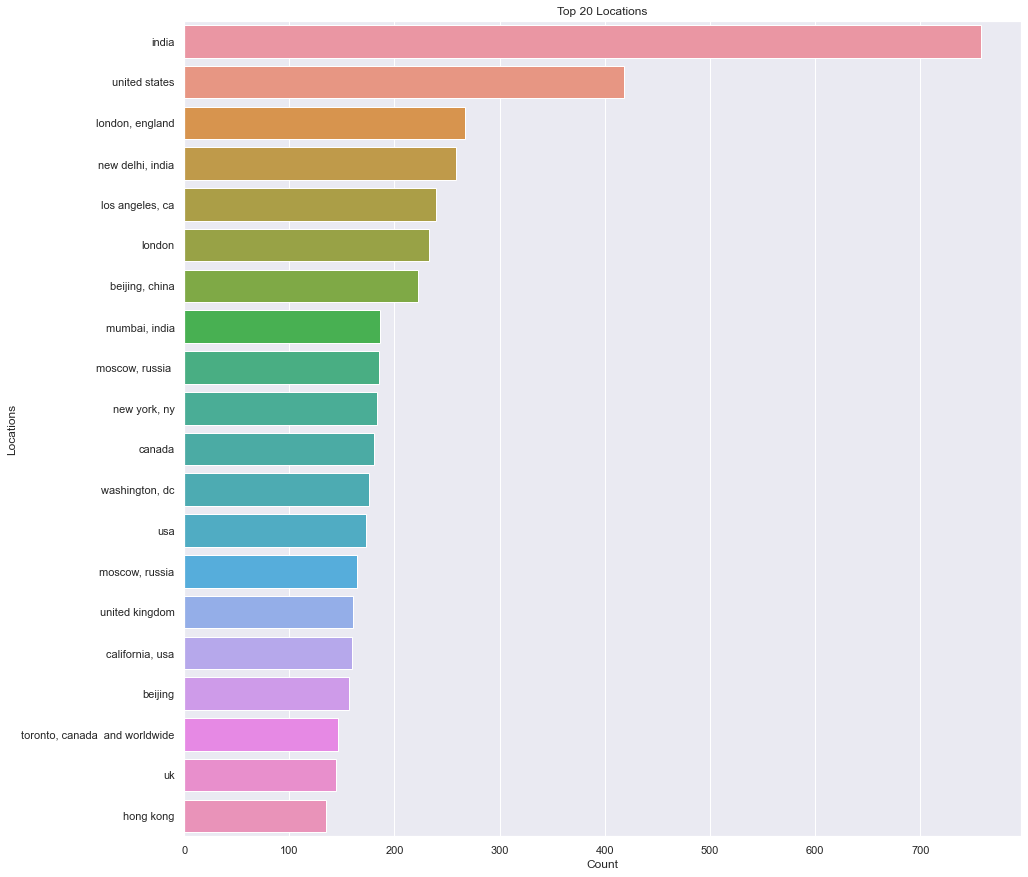

In [40]:
plt.figure(figsize=(15,15))
sns.set_theme(style='darkgrid')
sns.barplot(x='count', y='locations', orient='h', data=unique_loc_temp)
plt.xlabel('Count')
plt.ylabel('Locations')
plt.title('Top 20 Locations')

plt.savefig('./visualizations/top20-locations.png')

In [41]:
analyze['retweets'] = pd.to_numeric(arg=analyze['retweets'])
top_tweets = analyze.sort_values(by=['retweets'], ascending=False)

In [42]:
top_tweets = top_tweets.head(20)

In [43]:
print('All time top 20 tweets:\n')
top_tweets

All time top 20 tweets:



,username,location,following,followers,whenacctcreated,text,retweets,favourites,hashtags,whentweetcreated,mentioned_users,cleaned_text,vaccine,sentiment
31298,Sputnik V,"moscow, russia",142,341843,2020-08-11 09:12:38,"rdif, laboratorios richmond launched production of #sputnikv in argentina, the first country in latin america to ma…",11288,25724,['sputnikv'],2021-04-20 15:30:23,n.a.,rdif laboratorios richmond launch production argentina first country latin america ma,Sputnik,Neutral
9904,hotvickkrishna,"manhattan, ny",78,5197,2020-05-27 01:39:43,why we need two doses of mrna vaccine 💉 #vaccines #covid19 #pfizer #moderna #vaccinessavelives #vaccinated,7695,19622,"['vaccines', 'covid19', 'pfizer', 'moderna', 'vaccinessavelives', 'vaccinated']",2021-04-01 21:17:51,n.a.,need two dos mrna vaccine,Moderna,Neutral
31942,Sputnik V,"moscow, russia",142,513979,2020-08-11 09:12:38,#argentina's actor breaks into a live tv to show his #sputnikv vaccination certificate & express his gratitude. \n\nt…,2550,14412,"['argentina', 'sputnikv']",2021-05-19 15:01:14,n.a.,actor break live tv show vaccination certificate express gratitude t,Sputnik,Neutral
12394,dawnymock,fredericton new brunswick,5002,4493,2010-02-12 22:59:34,i see it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer #moderna…,2299,10175,"['covid', 'vaccine', 'pfizer', 'moderna']",2021-04-12 21:58:27,n.a.,see its go around signature cropped....so original,Moderna,Neutral
27480,Sputnik V,"moscow, russia",142,223700,2020-08-11 09:12:38,a batch of fake sputnik v vaccines was confiscated in mexico. see this comparison of the genuine #sputnikv with a f…,1980,3473,['sputnikv'],2021-03-18 14:43:13,n.a.,batch fake sputnik vaccine confiscate mexico see comparison genuine f,Sputnik,Negative
31723,Sputnik V,"moscow, russia",142,341846,2020-08-11 09:12:38,"breaking: #serbia starts #sputnikv production! \n\nrdif & institute of virology, vaccines and sera “torlak” join forc…",1759,5162,"['serbia', 'sputnikv']",2021-04-14 16:00:44,n.a.,break start production rdif institute virology vaccine sera torlak join forc,Sputnik,Positive
28912,Sputnik V,"moscow, russia",142,277609,2020-08-11 09:12:38,@alferdez the gamaleya institute: we are sad to hear this. #sputnikv is 91.6% effective against infection and 100%…,1299,6211,['sputnikv'],2021-04-03 06:25:28,['@alferdez'],gamaleya institute sad hear effective infection,Sputnik,Positive
31628,Sputnik V,"moscow, russia",142,341846,2020-08-11 09:12:38,"after starting #sputnikv production in #serbia, president vučić believes the country will soon be able to meet its…",835,1477,"['sputnikv', 'serbia']",2021-04-15 13:42:04,n.a.,start production president vui believe country soon able meet its,Sputnik,Positive
25996,Sputnik V,"moscow, russia",142,138550,2020-08-11 09:12:38,we love this cheerful warm-up before the #sputnikv vaccination in mexico’s xochimilco. that’s the spirit!,713,2430,['sputnikv'],2021-02-24 22:22:38,n.a.,love cheerful warm-up vaccination mexicos xochimilco thats spirit,Sputnik,Positive
25337,Sputnik V,"moscow, russia",140,64523,2020-08-11 09:12:38,"beating the rdif’s own forecast, 26, not 25, nations have become part of the #sputnikv family by the end of this we…",687,2152,['sputnikv'],2021-02-12 09:09:14,n.a.,beat rdifs forecast nation become part family end we,Sputnik,Neutral


In [44]:
top_tweets[['username', 'location', 'text', 'retweets', 'favourites', 'vaccine', 'sentiment']].to_excel('./top-tweets.xlsx', index=False)

In [45]:
from datetime import datetime

ind_to_drop = []
date = []

for i in range(0, len(analyze)):
    ith_date = analyze.iloc[i, :]['whentweetcreated']
    ith_match = re.search(r'\d{4}-\d{2}-\d{2}', ith_date)
    if ith_match == None:
        ind_to_drop.append[i]
    else:
        pass

In [46]:
analyze.drop(ind_to_drop, inplace=True)

In [47]:
analyze.shape

(36045, 14)

In [48]:
for i in range(0, len(analyze)):
    ith_date_str = analyze.iloc[i, :]['whentweetcreated']
    ith_match = re.search(r'\d{4}-\d{2}-\d{2}', ith_date_str)
    ith_date = datetime.strptime(ith_match.group(), '%Y-%m-%d').date()
    
    date.append(ith_date)
    
# Size of list 'date'
print('Len of date list: ', len(date))

Len of date list:  36045


In [49]:
analyze['dt_date'] = date

dt_date = analyze['dt_date']

unique_dates = dt_date.value_counts()

dates = pd.DataFrame({'dt_date': unique_dates.index, 'count': unique_dates.values})

tmp_dates = dates.head(15).sort_values('dt_date')

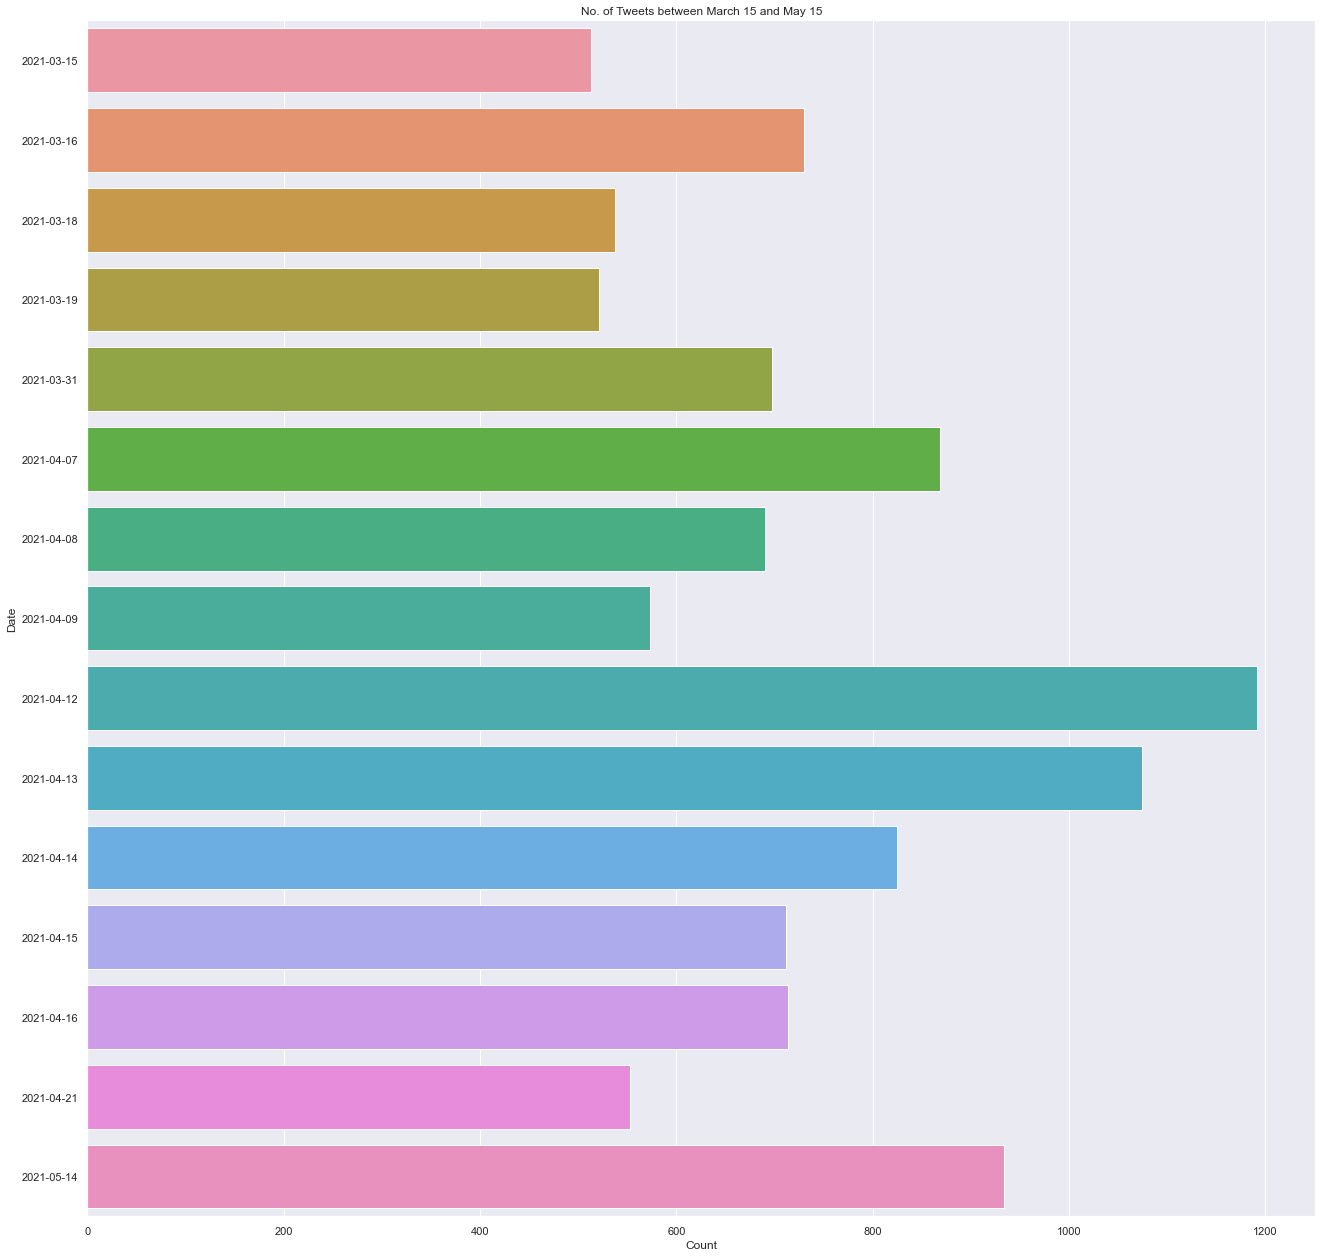

In [50]:
plt.figure(figsize=(22,22))
sns.barplot(y = 'dt_date', x = 'count', data = tmp_dates, orient = 'h')
plt.xlabel('Count')
plt.ylabel('Date')
plt.title('No. of Tweets between March 15 and May 15')
plt.savefig('./visualizations/number-of-tweets.png')

In [51]:
user_most_followers = pd.DataFrame(analyze.sort_values(by='followers', ascending=False))

In [52]:
user_most_followers = user_most_followers.groupby('username')[['followers', 'dt_date']].max().sort_values(by = 'followers', ascending = False)
user_most_followers['username'] = user_most_followers.index
user_most_followers.reset_index(inplace = True, drop = True)

user_most_followers.head()

,followers,dt_date,username
0,15415623,2021-05-20,NDTV
1,13662398,2021-04-22,CGTN
2,13655812,2021-05-14,The Times Of India
3,12485630,2021-04-21,China Xinhua News
4,10977947,2021-03-16,ABP News


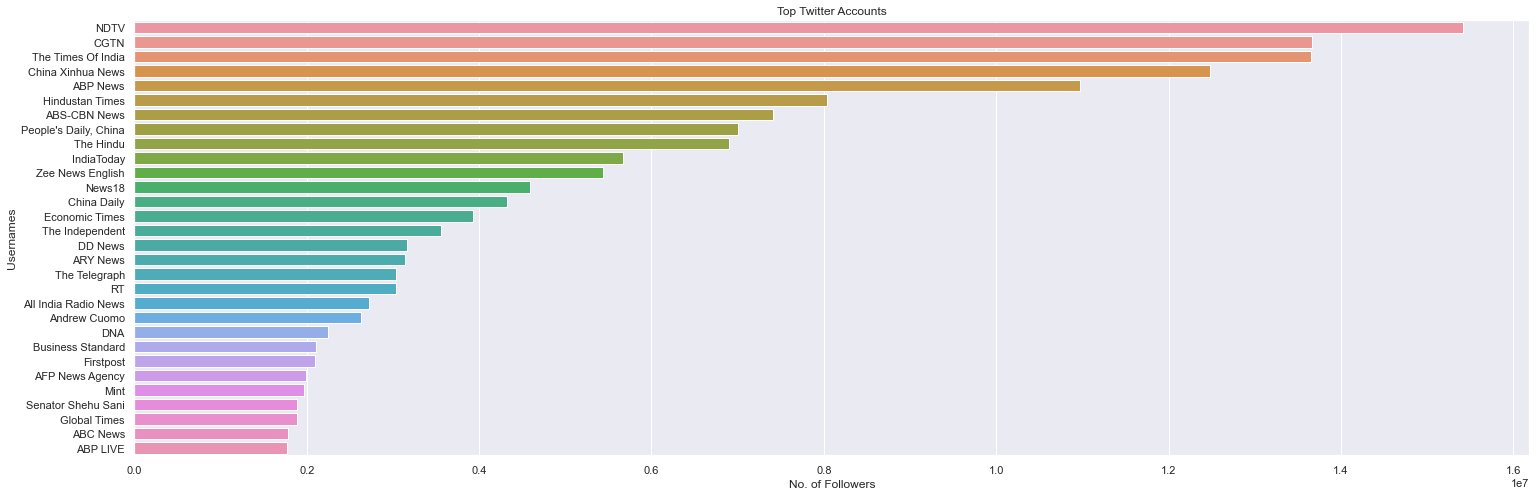

In [53]:
plt.figure(figsize = (25, 8))
sns.barplot(x = 'followers', y = 'username', orient = 'h', data = user_most_followers.head(30))
plt.xlabel('No. of Followers')
plt.ylabel('Usernames')
plt.title('Top Twitter Accounts')
plt.savefig('./visualizations/top-twitter-accounts.png')

In [54]:
def find_users(df):
    # df: dataframe to look at
    # returns a list of usernames
    
    # Create empty list
    list_users = []
    
    for i in range(0, len(df)):
        users_ith_text = re.findall('@[^\s]+', df.iloc[i,:]['text'])
        # returns a list
        # append to list_users by going through a for-loop:
        for j in range(0, len(users_ith_text)):
            list_users.append(users_ith_text[j])
    
    return list_users

In [55]:
# Apply on dataframe data['text']
list_users = find_users(analyze)

mentioned_users_df = pd.DataFrame({
    'mentioned_users': list_users
})

mentionedusers = mentioned_users_df.groupby('mentioned_users').size().reset_index(name = 'totalcount').sort_values(by = 'totalcount', ascending = False)
mentionedusers.head()

,mentioned_users,totalcount
5626,@sputnikvaccine,726
3932,@moderna_tx,197
4675,@pfizer,189
1574,@dollyparton,157
1711,@drreddys,133


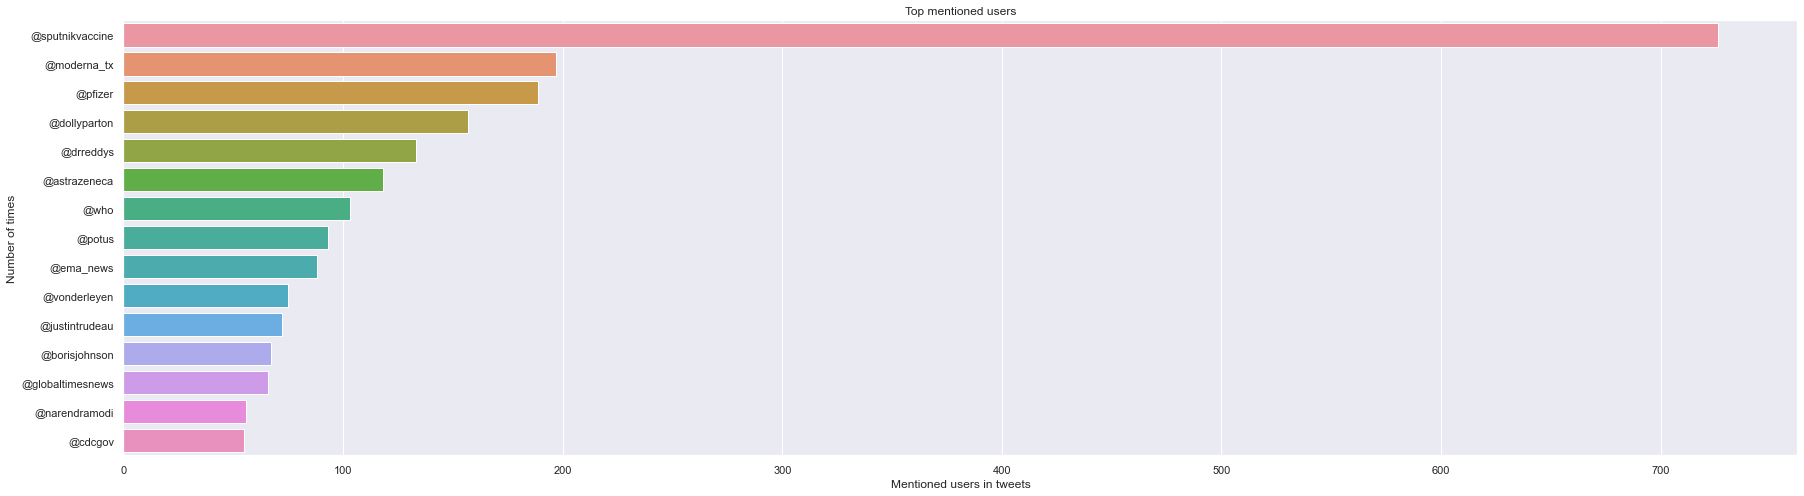

In [56]:
plt.figure(figsize=(30,8))
sns.barplot(x = 'totalcount', y = 'mentioned_users', data = mentionedusers.head(15))
plt.xlabel('Mentioned users in tweets')
plt.ylabel('Number of times')
plt.title('Top mentioned users')
plt.savefig('./visualizations/top-mentioned-users.png')